<a href="https://colab.research.google.com/github/pony-yyy/GroupWork/blob/main/Restaurant_in_TN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
# Authenticate and access Google Cloud services
from google.colab import auth
auth.authenticate_user()

In [75]:
# Import the necessary libraries
from google.cloud import storage
from google.cloud import bigquery

project_id = "bdao-ima-422711"
dataset_name = "bobbdaoima"
table_name = "restaurant_tips" # if you make changes previously, then here you need to make according change

bigquery_client = bigquery.Client(project=project_id)

In [76]:
# Query all data from the table
query = f"""
  SELECT
  b.business_id,
  t.text AS review
FROM
  `{project_id}.{dataset_name}.All_data_cleaned` b
INNER JOIN
  `{project_id}.{dataset_name}.restaurant_tips` t
ON
  b.business_id = t.business_id
WHERE
  b.state = 'TN';

"""

query_job = bigquery_client.query(query)
results = query_job.result()

reviewInPa_df = query_job.to_dataframe()
reviewInPa_df

,business_id,review
0,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch
1,_uN0OudeJ3Zl_tf6nxg5ww,"Thanks to my sis, lunch ia covered by my b-day..."
2,_uN0OudeJ3Zl_tf6nxg5ww,The Green Curry Chicken is awesome !
3,_uN0OudeJ3Zl_tf6nxg5ww,Try the red curry!
4,_uN0OudeJ3Zl_tf6nxg5ww,Our new favorite place for spicy thai curry......
...,...,...
53061,F23zFNnWhIjh3EPx2vr-pw,"Bajo sexto taco translates (roughly) to ""short..."
53062,ED-YlmolJpWMosZMBe2LYg,Well so far my waiter has forgotten I placed a...
53063,XKW1oqohKur_ZlEi39x9gA,This place sure has gone downhill... There's n...
53064,xAwES1JxVnoLmRPGrVu30Q,Served and ran by Filipinos also from SoCal! H...


In [77]:
import pandas as pd
from textblob import TextBlob
import numpy as np

target_column = 'review'

reviewInPa_df['Polarity'] = reviewInPa_df[target_column].apply(lambda review: TextBlob(str(review)).sentiment.polarity)
reviewInPa_df['Subjectivity'] = reviewInPa_df[target_column].apply(lambda review: TextBlob(str(review)).sentiment.subjectivity)

reviewInPa_df['Sentiment'] = np.where(reviewInPa_df['Polarity'] > 0, 'Positive', np.where(reviewInPa_df['Polarity'] < 0, 'Negative', 'Neutral'))

reviewInPa_df

,business_id,review,Polarity,Subjectivity,Sentiment
0,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,0.357143,0.571429,Positive
1,_uN0OudeJ3Zl_tf6nxg5ww,"Thanks to my sis, lunch ia covered by my b-day...",0.200000,0.200000,Positive
2,_uN0OudeJ3Zl_tf6nxg5ww,The Green Curry Chicken is awesome !,0.066667,0.750000,Positive
3,_uN0OudeJ3Zl_tf6nxg5ww,Try the red curry!,0.000000,0.000000,Neutral
4,_uN0OudeJ3Zl_tf6nxg5ww,Our new favorite place for spicy thai curry......,0.318182,0.727273,Positive
...,...,...,...,...,...
53061,F23zFNnWhIjh3EPx2vr-pw,"Bajo sexto taco translates (roughly) to ""short...",0.291667,0.766667,Positive
53062,ED-YlmolJpWMosZMBe2LYg,Well so far my waiter has forgotten I placed a...,0.100000,1.000000,Positive
53063,XKW1oqohKur_ZlEi39x9gA,This place sure has gone downhill... There's n...,0.500000,0.761111,Positive
53064,xAwES1JxVnoLmRPGrVu30Q,Served and ran by Filipinos also from SoCal! H...,0.000000,0.000000,Neutral


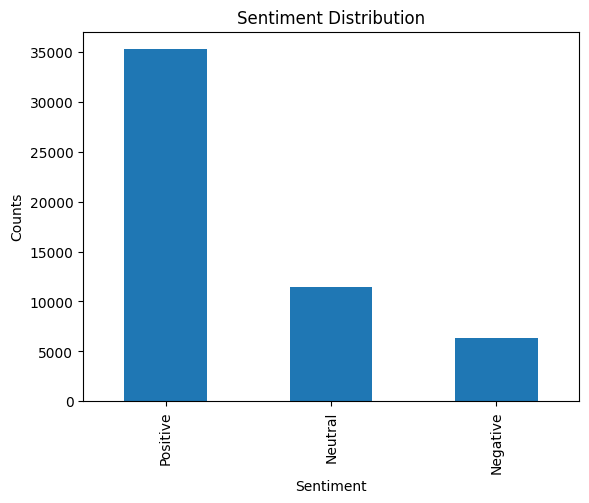

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

sentiment_counts = reviewInPa_df['Sentiment'].value_counts()

sentiment_counts.plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.show()

In [79]:
positive_reviews = reviewInPa_df[reviewInPa_df['Sentiment'] == 'Positive']

positive_review_counts = positive_reviews.groupby('business_id').size()

top_10_positive_businesses = positive_review_counts.sort_values(ascending=False).head(10)

print(top_10_positive_businesses)

business_id
GXFMD0Z4jEVZBCsbPf4CTQ    408
1b5mnK8bMnnju_cvU65GqQ    258
VAeEXLbEcI9Emt9KGYq9aA    255
C9K3579SJgLPp0oAOM29wg    230
oIH5YWPy_g61YXM6R900Wg    227
6Pu5MKIWbn6FO-oebSSrYQ    171
xlMQBBt9wrtahdqiRDcVSg    156
gVU0U7gNBMQxKTzqmRtdLg    155
pSmOH4a3HNNpYM82J5ycLA    155
OWOOc0YjU_kioLeEgo5VCA    150
dtype: int64


In [80]:
top_10_positive_businesses_df = top_10_positive_businesses.reset_index()
top_10_positive_businesses_df.columns = ['business_id', 'positive_review_count']

print(top_10_positive_businesses_df)

              business_id  positive_review_count
0  GXFMD0Z4jEVZBCsbPf4CTQ                    408
1  1b5mnK8bMnnju_cvU65GqQ                    258
2  VAeEXLbEcI9Emt9KGYq9aA                    255
3  C9K3579SJgLPp0oAOM29wg                    230
4  oIH5YWPy_g61YXM6R900Wg                    227
5  6Pu5MKIWbn6FO-oebSSrYQ                    171
6  xlMQBBt9wrtahdqiRDcVSg                    156
7  gVU0U7gNBMQxKTzqmRtdLg                    155
8  pSmOH4a3HNNpYM82J5ycLA                    155
9  OWOOc0YjU_kioLeEgo5VCA                    150


In [81]:
# Import the necessary libraries
from google.cloud import storage
from google.cloud import bigquery

project_id = "bdao-ima-422711"
dataset_name = "bobbdaoima"
table_name = "restaurant_data" # if you make changes previously, then here you need to make according change

bigquery_client = bigquery.Client(project=project_id)

# Query all data from the table
query = f"""
   SELECT business_id,categories
   FROM `{project_id}.{dataset_name}.{table_name}`;

"""

query_job = bigquery_client.query(query)
results = query_job.result()

categories_df = query_job.to_dataframe()
categories_df

,business_id,categories
0,kfNv-JZpuN6TVNSO6hHdkw,"Steakhouses, Asian Fusion, Restaurants"
1,sqSqqLy0sN8n2IZrAbzidQ,"Pizza, Chicken Wings, Sandwiches, Restaurants"
2,RK6-cJ9hj53RzOlCBmpT-g,"Restaurants, Italian, Food Trucks, Food"
3,EuRGgOwJ0g1vTj2R04j37Q,"Seafood, Restaurants"
4,pmuuoDqNZp7518AUd-YmPA,"Restaurants, Bakeries, Caterers, Bagels, Food,..."
...,...,...
52281,xThXwInJdMTI2yhgY3Uwyw,"Restaurants, Mexican"
52282,QKB21Alitgj-m6oEoFZFBw,"Restaurants, Mexican"
52283,4D19uG4enigRAsvTVmn61g,"Restaurants, Mexican"
52284,HUJLxKMVmUvreA-07qUitg,"Restaurants, Mexican"


In [82]:
categories_in_top_10_businesses = pd.merge(top_10_positive_businesses_df, categories_df, on='business_id', how='inner')
categories_in_top_10_businesses

,business_id,positive_review_count,categories
0,GXFMD0Z4jEVZBCsbPf4CTQ,408,"American (Traditional), Chicken Shop, Southern..."
1,1b5mnK8bMnnju_cvU65GqQ,258,"Burgers, American (Traditional), Breakfast & B..."
2,VAeEXLbEcI9Emt9KGYq9aA,255,"Burgers, Sandwiches, Food, Beer, Wine & Spirit..."
3,C9K3579SJgLPp0oAOM29wg,230,"Pubs, Nightlife, American (Traditional), Barbe..."
4,oIH5YWPy_g61YXM6R900Wg,227,"Southern, Grocery, Restaurants, Barbeque, Amer..."
5,6Pu5MKIWbn6FO-oebSSrYQ,171,"Seafood, Bars, Breakfast & Brunch, Nightlife, ..."
6,xlMQBBt9wrtahdqiRDcVSg,156,"American (New), Restaurants, Pubs, Beer, Wine ..."
7,gVU0U7gNBMQxKTzqmRtdLg,155,"Burgers, Steakhouses, American (New), Chicken ..."
8,pSmOH4a3HNNpYM82J5ycLA,155,"Restaurants, Sandwiches, Food, Breakfast & Bru..."
9,OWOOc0YjU_kioLeEgo5VCA,150,"Food, American (Traditional), Arts & Entertain..."


In [83]:
pip install wordcloud

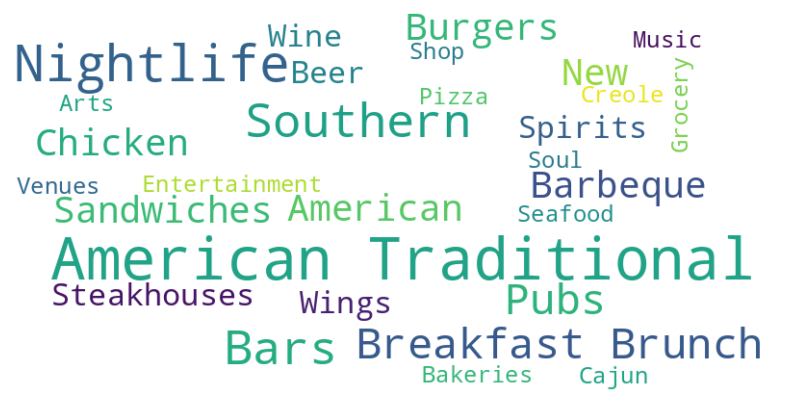

In [84]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from collections import Counter

text = ' '.join(category for category in categories_in_top_10_businesses['categories'])

custom_stopwords = set(STOPWORDS)
custom_stopwords.update(['Restaurants', 'Food', 'Restaurant',"&","Markets","Shops"])


cleaned_words = [word for word in text.split() if word not in custom_stopwords]

word_counts = Counter(cleaned_words)

sorted_words = word_counts.most_common()

# for word, count in sorted_words:
#     print(f"{word}: {count}")

wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=custom_stopwords).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
